## Reproducibility in Exploring Spatial Patterns

We visualized the geographic places that mentioned in the eleven testimonies and tried to explore the spatial patterns of these
places to identify the possible strategic moving plan for these Holocaust survivors. 

In terms of the reproducibility, we build up a detailed workflow that illustrates the procedures step by step with solid justifications. 

The following workflow illustrates how we extract geographic names and explore the spaital patterns. 

In [1]:

%matplotlib inline
import os
from datetime import datetime

# set environment variable needed for basemap

os.environ["PROJ_LIB"] = '/opt/conda/envs/python2/share/proj'

import numpy as np
import mpl_toolkits

import pandas as pd
import geopandas as gpd
from geopandas import GeoSeries, GeoDataFrame
from shapely.geometry import Point

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

import json
import mplleaflet
import folium

/opt/conda/envs/python2/lib/python2.7/site-packages/folium/__init__.py:59: UserWarning: This version of folium is the last to support Python 2. Transition to Python 3 to be able to receive updates and fixes. Check out https://python3statement.org/ for more info.
  UserWarning


In [2]:
%matplotlib inline
import os
import geopandas as gpd
import pandas as pd
import numpy as np
import shapely

In [3]:
# read shapefile 
# arr = os.listdir()
# print(arr)
# f = []
# for (dirpath, dirnames, filenames) in os.walk("."):
#     f.extend(filenames)
#     break
# print os.path.join("./","Cities_Merge5.shp")
cities_shp=gpd.read_file(os.path.join("./","Cities_Merge5.shp"))
# cities_shp=gpd.read_file("Cities_Merge5.shp")
type(cities_shp)

geopandas.geodataframe.GeoDataFrame

In [4]:
cities_shp.head()

,ADM0_A3,ADM1NAME,ISO_A2,NOTE,LATITUDE,LONGITUDE,CHANGED,NAMEDIFF,DIFFNOTE,POP_MAX,POP_MIN,POP_OTHER,RANK_MAX,OID_,City,Frequency,Lat,Long,geometry
0,HUN,Hajdú-Bihar,HU,None,47.530470,21.630039,0.0,0,None,231286,204124,223992,10,19,Debrecen,5,47.530470,21.630039,POINT (21.6300386136 47.5304695832)
1,POL,Silesian,PL,None,50.330376,18.670013,0.0,0,None,507670,198835,314378,11,26,Gliwice,3,50.330376,18.670013,POINT (18.6700125719 50.3303761994)
2,POL,Lódz,PL,None,51.774991,19.451360,1.0,0,Changed scale rank.,758000,758000,838378,11,0,Lodz,12,51.774991,19.451360,POINT (19.4513602282 51.7749908642)
3,USA,Ohio,US,None,41.469987,-81.694998,0.0,0,None,1890000,449514,1711162,12,18,Cleveland,5,41.469987,-81.694998,POINT (-81.69499821140001 41.4699867951)
4,NOR,Hordaland,NO,None,60.391002,5.324522,4.0,0,Location adjusted.,213585,187194,0,10,13,Bergen,10,60.391002,5.324522,POINT (5.32452225609 60.3910024202)


In [5]:
# read another shapefile
countries_shp=gpd.read_file(os.path.join("./","Counties_14_new.shp"))
type(countries_shp)
countries_shp.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_TR,NAME_VI,NAME_ZH,OID_,Country,Frequency,OID1,Country_1,Frequenc_1,geometry
0,Admin-0 country,3,3,United Kingdom,GB1,1,2,Dependency,Dhekelia Sovereign Base Area,ESB,...,Dhekelia Kantonu,Căn cứ quân sự Dhekelia,None,8,United Kingdom,14,8,United Kingdom,14,"POLYGON ((33.78093509200005 34.97634511900009,..."
1,Admin-0 country,0,3,Ukraine,UKR,0,2,Sovereign country,Ukraine,UKR,...,Ukrayna,Ukraina,乌克兰,11,Ukraine,3,11,Ukraine,3,(POLYGON ((31.76434493000005 52.10056772900005...
2,Admin-0 country,0,2,Russia,RUS,0,2,Sovereign country,Russia,RUS,...,Rusya,Nga,俄罗斯,1,Russia,35,1,Russia,35,(POLYGON ((87.81632409700006 49.16583730100008...
3,Admin-0 country,0,5,Czechia,CZE,0,2,Sovereign country,Czechia,CZE,...,Çek Cumhuriyeti,Cộng hòa Séc,捷克,6,Czechia,57,6,Czechia,57,"POLYGON ((14.81039270000014 50.85844716400005,..."
4,Admin-0 country,0,2,Germany,DEU,0,2,Sovereign country,Germany,DEU,...,Almanya,Đức,德国,13,Germany,74,13,Germany,74,(POLYGON ((13.81572473100007 48.76643015600006...


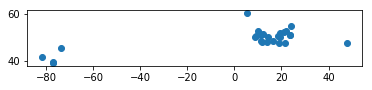

In [6]:
# mapping 
cities_shp.plot()

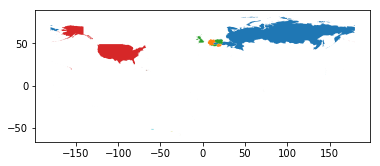

In [7]:
countries_shp.plot(cmap="tab10")

(-88.16638245929974, 54.12521794789974) (37.789734538107, 61.496161082092996)


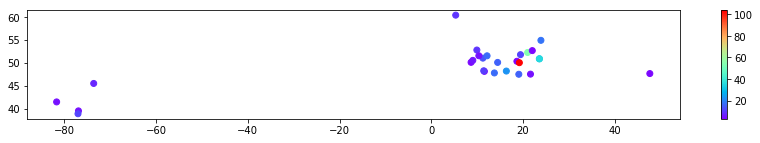

In [8]:
cities_shp.plot(column='Frequency', cmap='rainbow', legend=True,k=5, figsize=(15,2),legend_kwds={'loc':'lower left'})
# plt.title('2010 Population Distribution in Massachusetts', fontsize=20)
print plt.xlim(), plt.ylim()

(-88.16390209572529, 54.1225965640281) (37.80263271425258, 61.48187482668431)


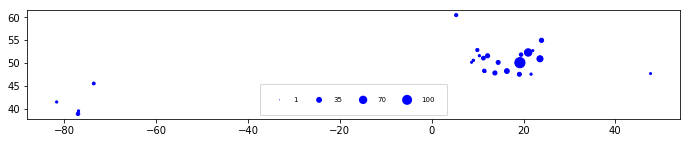

In [9]:
# add legend to the map
cities_shp.plot(markersize="Frequency", color="blue",legend=True,k=5, figsize=(15,2),legend_kwds={'loc':'lower left'})
# plt.title('2010 Population Distribution in Massachusetts', fontsize=20)
print plt.xlim(), plt.ylim()
# 
l1 = plt.scatter([],[], s=1, color="blue",edgecolors='none')
l2 = plt.scatter([],[], s=35, color="blue",edgecolors='none')
l3 = plt.scatter([],[], s=70, color="blue", edgecolors='none')
l4 = plt.scatter([],[], s=100, color="blue",edgecolors='none')

labels = ["1", "35", "70", "100"]


leg = plt.legend([l1, l2, l3, l4], labels, ncol=4, frameon=True, fontsize=7,
handlelength=2, loc = 8, borderpad = 1.8,
handletextpad=1, scatterpoints = 1)

(-197.99999999999991, 198.0) (-66.53932463939996, 88.92528310740009)


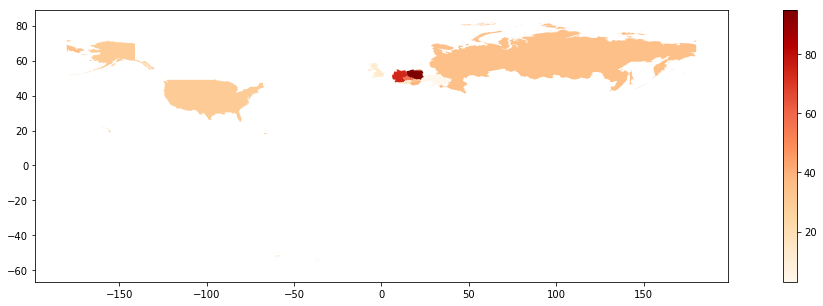

In [10]:
# change the color scheme for the map
countries_shp.plot(column='Frequency', cmap='OrRd', legend=True,k=5, figsize=(20,5),legend_kwds={'loc':'lower left'})
# plt.title('2010 Population Distribution in Massachusetts', fontsize=20)
print plt.xlim(), plt.ylim()

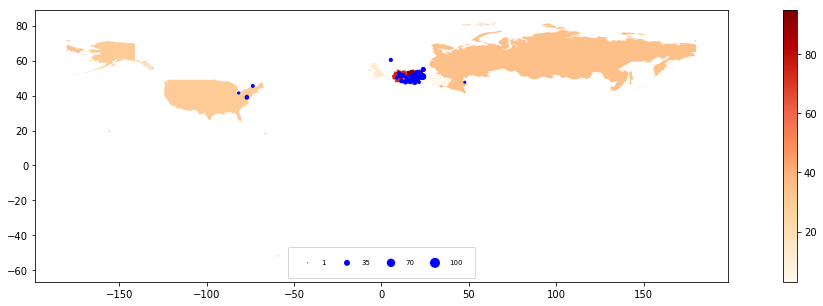

In [26]:
# map multiple layers 
ax_countries=countries_shp.plot(column='Frequency', cmap='OrRd', legend=True,k=5, figsize=(20,5),legend_kwds={'loc':'lower left'})
cities_shp.plot(ax=ax_countries,markersize="Frequency", color="blue")

# plt.title('2010 Population Distribution in Massachusetts', fontsize=20)
# add legend
l1 = plt.scatter([],[], s=1, color="blue",edgecolors='none')
l2 = plt.scatter([],[], s=35, color="blue",edgecolors='none')
l3 = plt.scatter([],[], s=70, color="blue", edgecolors='none')
l4 = plt.scatter([],[], s=100, color="blue",edgecolors='none')

labels = ["1", "35", "70", "100"]


leg = plt.legend([l1, l2, l3, l4], labels, ncol=4, frameon=True, fontsize=7,
handlelength=2, loc = 8, borderpad = 1.8,
handletextpad=1, scatterpoints = 1)

In [24]:
# countries_shp.plot() it works!!!

# fig, ax = plt.subplots()
ax=countries_shp.plot(column='Frequency', cmap='OrRd', legend=True,k=5, figsize=(20,5),legend_kwds={'loc':'lower left'})
cities_shp.plot(markersize="Frequency", color="blue",ax=ax)

mplleaflet.display(fig=ax.figure, crs=countries_shp.crs)
mplleaflet.show(fig=ax.figure, crs=countries_shp.crs)


In [27]:
# save map to a html file
mplleaflet.show(fig=ax.figure, crs=countries_shp.crs, tiles='cartodb_positron', path='cities_countries.html')

In [ ]:
# plot interactively

mplleaflet.display(fig=ax.figure, crs=countries_shp.crs)

In [25]:
%%html
<iframe src='_map.html' width=1000 height=600/>